In [30]:
print("AMazon stock price prediction !")

AMazon stock price prediction !


In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import datetime

# Fetch data
ticker = 'AMZN'
data = yf.download(ticker, start='2015-01-01', end=datetime.date.today().strftime('%Y-%m-%d'))
df = data[['Close']]  # Focus on closing price
df.to_csv('amzn_data.csv')  # Save for later
print(df.head())  # Check it out

/tmp/ipython-input-2536818997.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end=datetime.date.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

Price         Close
Ticker         AMZN
Date               
2015-01-02  15.4260
2015-01-05  15.1095
2015-01-06  14.7645
2015-01-07  14.9210
2015-01-08  15.0230


In [32]:
# Scale to 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Look back 60 days
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM shape: samples, timesteps, features

# Split: 80% train, 20% test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [33]:
# Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output next price

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save model
model.save('amzn_lstm_model.h5')

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0441 - val_loss: 0.0013
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 9.7068e-04
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 8.7301e-04
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 8.1298e-04
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0072
Epoch 12/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 -

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━

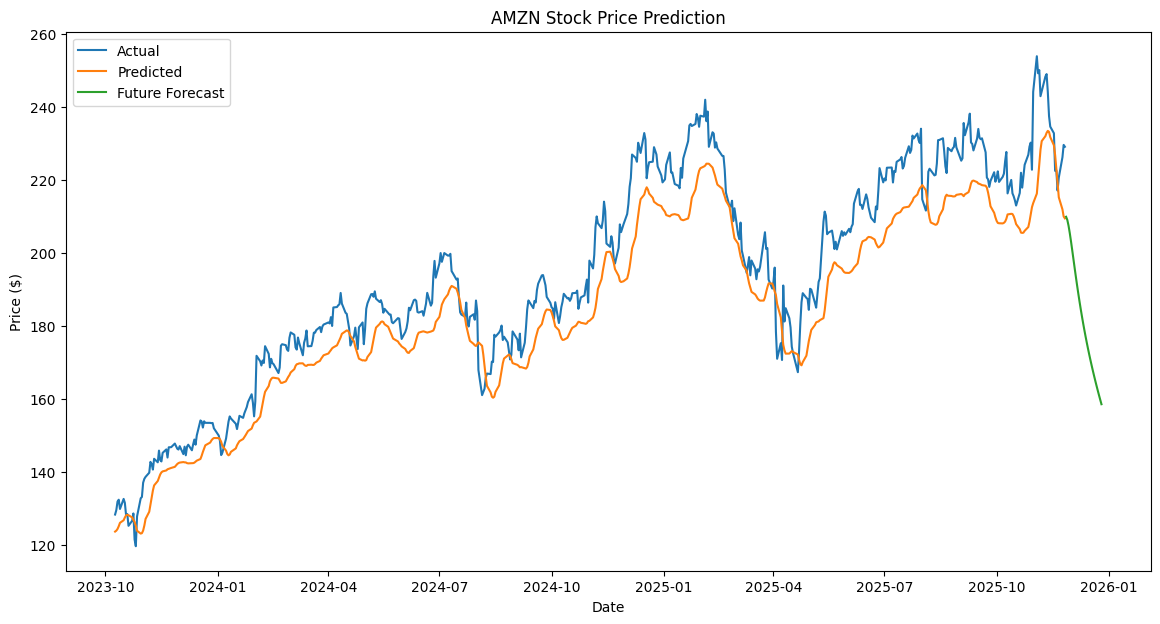

In [34]:
# Predict on test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Future prediction (next 30 days)
last_60 = scaled_data[-seq_length:].reshape(1, seq_length, 1)
future_preds = []
for _ in range(30):
    next_pred = model.predict(last_60)
    future_preds.append(next_pred[0, 0])
    last_60 = np.roll(last_60, -1, axis=1)
    last_60[0, -1, 0] = next_pred[0, 0]
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_pred):], y_pred, label='Predicted')
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, future_preds, label='Future Forecast')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')  # Lower = better

RMSE: 11.11


In [36]:
pip install streamlit

In [37]:
# CELL 6 — FIXED STREAMLIT APP (just replace your old cell with this)

import streamlit as st
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# THIS IS THE ONLY LINE THAT FIXES EVERYTHING
@st.cache_resource
def load_fixed_model():
    return load_model('amzn_lstm_model.h5', compile=False)   # ← compile=False = magic

model = load_fixed_model()
# END OF FIX

st.set_page_config(page_title="AMZN Stock Predictor", layout="wide")
st.title("Amazon (AMZN) Stock Price Predictor")
st.markdown("LSTM model • Real-time data • Predict next 1–30 days")

days = st.slider("How many days to predict?", 1, 30, 7, help="Max 30 days (model gets uncertain after that)")

@st.cache_data(ttl=3600)  # refresh data every hour
def get_stock_data():
    return yf.download("AMZN", period="5y")["Close"]

prices = get_stock_data()

col1, col2 = st.columns(2)
with col1:
    latest = prices.iloc[-1].item()                     # ← added .item()
    st.metric("Latest Close Price", f"${latest:.2f}")

with col2:
    latest = prices.iloc[-1].item()                     # reuse
    year_ago = prices.iloc[-252].item()                 # ← added .item()
    change = (latest / year_ago - 1) * 100
    st.metric("Change since 1 year ago", f"{change:+.1f}%")

if st.button("Generate Forecast", type="primary"):
    with st.spinner("Running LSTM prediction..."):
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(prices.values.reshape(-1, 1))

        seq_length = 60
        last_sequence = scaled[-seq_length:].reshape(1, seq_length, 1)
        predictions = []

        for _ in range(days):
            next_pred = model.predict(last_sequence, verbose=0)
            predictions.append(next_pred[0, 0])
            # shift the window forward
            last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

        pred_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

        future_dates = pd.date_range(start=prices.index[-1] + pd.Timedelta(days=1), periods=days)

        # Results
        st.success(f"Forecast for next {days} days:")
        result = pd.DataFrame({"Date": future_dates.date, "Predicted Price": pred_prices.round(2)})
        st.dataframe(result, use_container_width=True)

        # Plot
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(prices.index[-200:], prices[-200:], label="Historical", color="#1f77b4")
        ax.plot(future_dates, pred_prices, label="Forecast", color="orange", linewidth=3)
        ax.set_title("AMZN Stock Price — LSTM Forecast", fontsize=18)
        ax.legend()
        ax.grid(alpha=0.3)
        st.pyplot(fig)

        # Bonus insight
        expected = pred_prices[-1]
        change = (expected - prices.iloc[-1]) / prices.iloc[-1] * 100
        st.info(f"Model expects AMZN to reach **${expected:.2f}** in {days} days → **{change:+.2f}%** from today")

st.sidebar.header("How to deploy this live")
st.sidebar.code("""1. Download this notebook
2. File → Save a copy in GitHub
3. Go to huggingface.co/new → Spaces → Connect your repo
4. Choose "Streamlit" → Create → Done!""")
st.sidebar.success("Your live app will be ready in < 2 minutes!")

2025-11-27 08:31:38.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-27 08:31:38.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-27 08:31:38.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-27 08:31:38.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-27 08:31:38.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-27 08:31:38.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-27 08:31:38.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-27 08:31:38.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())